In [1]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation , BatchNormalization
from keras.layers import Conv2D , MaxPool2D , Flatten , Dropout, Dense, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers,models
!pip install wandb

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import keras
import cv2

import wandb
from tensorflow.keras.callbacks import Callback

class WandbCallback(Callback):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
    
    def on_epoch_end(self, epoch, logs=None):
        wandb.log(logs)




In [2]:
data_path=r'C:\Users\ASUS USER\Desktop\New folder (4)\dataset\train'

categories=os.listdir(data_path) ## list the files in that direction
print(categories) 
labels=np.arange(len(categories))
print(labels)
labels_dict=dict(zip(categories,labels))
print(labels_dict)

['cats', 'Dogs']
[0 1]
{'cats': 0, 'Dogs': 1}


In [27]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img  # Import load_img function
from sklearn.model_selection import train_test_split
img_height = 300
img_width = 300
def load_images_and_labels(data_path, categories, labels_dicts, img_height, img_width):
    images = []
    labels = []
    for category in categories:
        folder_path = os.path.join(data_path, category)
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            try:
                img = load_img(img_path, target_size=(img_height, img_width))
                img_array = img_to_array(img)
                images.append(img_array)
                labels.append(labels_dict[category])
            except Exception as e:
                print(f"Error loading image '{img_path}': {e}")
    return np.array(images), np.array(labels)

# Example usage
images, labels = load_images_and_labels(data_path, categories, labels_dict, img_height, img_width)
# print(images)
# print(labels)


In [29]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.1, random_state=42)

# print(X_train)
print(y_train)

[1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0
 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1
 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0
 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0
 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0
 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0
 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0
 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1
 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0
 0 0 0 0 1 0 1 1 0 1 1 1 

In [5]:
# Normalize the images
X_train = X_train / 255.0
X_val = X_val / 255.0


In [6]:
def main_model(filter_org, dropout, dense_size, batch_norm):
    model = tf.keras.Sequential()
    
    if filter_org == 'same':
        no_of_filters = [64, 64, 64, 64, 64]
    elif filter_org == 'double':
        no_of_filters = [32, 64, 128, 256, 512]
    elif filter_org == 'half':
        no_of_filters = [512, 256, 128, 64, 8]
    elif filter_org == 'p1':
        no_of_filters = [32, 64, 64, 128, 128]
    elif filter_org == 'p2':
        no_of_filters = [128, 128, 128, 64, 64]

    for i in range(5):
        if i == 0:
            model.add(tf.keras.layers.Conv2D(no_of_filters[i], (3, 3), input_shape=(300, 300, 3)))
        else:
            model.add(tf.keras.layers.Conv2D(no_of_filters[i], (3, 3)))
        if batch_norm == 'yes':
            model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Activation("relu"))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(dense_size))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Activation("relu"))
    model.add(tf.keras.layers.Dense(10))
    model.add(tf.keras.layers.Activation("softmax"))
    
    return model


In [7]:
sweep_config = {
    'name': 'sweep1.1',
    'method': 'grid',  #  can use 'grid', 'random', or 'bayes'
    'metric': {
        'name': 'val_accuracy',
        'goal': 'maximize'
    },
    'parameters': {
        'filter_org': {
            'values': ['p1']
        },
        'dense_size': {
            'values': [256, 64, 128]
        },
        'batch_norm': {
            'values': ['yes', 'no']
        },
        'augment': {
            'values': [True, False]
        },
        'dropout': {
            'values': [0.2, 0.4]
        },
        'batch_size_': {
            'values': [32, 64]
        },
        'learning_rate': {
            'values': [0.0005]
        },
        'epochs': {
            'values': [3]
        }
    }
}


In [8]:
def train():
    # Initialize a new wandb run
    wandb.init()
    config = wandb.config

    # Get the model
    model = main_model(config.filter_org, config.dropout, config.dense_size, config.batch_norm)
    
    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=config.learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Define data augmentation if specified
    if config.augment:
        train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest'
        )
    else:
        train_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
    
    val_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
    
    train_generator = train_datagen.flow(X_train, y_train, batch_size=config.batch_size_)
    val_generator = val_datagen.flow(X_val, y_val, batch_size=config.batch_size_)
    
    # Train the model
    model.fit(
        train_generator,
        epochs=config.epochs,
        validation_data=val_generator,
        callbacks=[WandbCallback()]
    )


In [9]:
# Configure the sweep
sweep_id = wandb.sweep(sweep_config)

Create sweep with ID: xhkkugbo
Sweep URL: https://wandb.ai/salinda/uncategorized/sweeps/xhkkugbo


In [10]:
# Start the sweep job
wandb.agent(sweep_id, function=train, count=10)

wandb: Agent Starting Run: b6vqdjsd with config:
wandb: 	augment: True
wandb: 	batch_norm: yes
wandb: 	batch_size_: 32
wandb: 	dense_size: 256
wandb: 	dropout: 0.2
wandb: 	epochs: 3
wandb: 	filter_org: p1
wandb: 	learning_rate: 0.0005
wandb: Currently logged in as: salindahulangamuwa (salinda). Use `wandb login --relogin` to force relogin




Epoch 1/3


19/19 [==============================] - 53s 2s/step - loss: 2.2226 - accuracy: 0.5162 - val_loss: 0.7428 - val_accuracy: 0.5692
Epoch 2/3
19/19 [==============================] - 35s 2s/step - loss: 1.1161 - accuracy: 0.5897 - val_loss: 0.7040 - val_accuracy: 0.5692
Epoch 3/3
19/19 [==============================] - 35s 2s/step - loss: 0.9115 - accuracy: 0.6205 - val_loss: 0.6786 - val_accuracy: 0.5692


accuracy,▁▆█
loss,█▂▁
val_accuracy,▁▁▁
val_loss,█▄▁
accuracy,0.62051
loss,0.9115
val_accuracy,0.56923
val_loss,0.67862


wandb: Agent Starting Run: vul2mekv with config:
wandb: 	augment: True
wandb: 	batch_norm: yes
wandb: 	batch_size_: 32
wandb: 	dense_size: 256
wandb: 	dropout: 0.4
wandb: 	epochs: 3
wandb: 	filter_org: p1
wandb: 	learning_rate: 0.0005


Epoch 1/3
19/19 [==============================] - 48s 2s/step - loss: 2.0927 - accuracy: 0.5282 - val_loss: 0.9722 - val_accuracy: 0.5692
Epoch 2/3
19/19 [==============================] - 35s 2s/step - loss: 1.1007 - accuracy: 0.5573 - val_loss: 0.7223 - val_accuracy: 0.5692
Epoch 3/3
19/19 [==============================] - 32s 2s/step - loss: 0.8917 - accuracy: 0.5880 - val_loss: 0.7659 - val_accuracy: 0.5692


accuracy,▁▄█
loss,█▂▁
val_accuracy,▁▁▁
val_loss,█▁▂
accuracy,0.58803
loss,0.89172
val_accuracy,0.56923
val_loss,0.76587


wandb: Agent Starting Run: gziwwbr1 with config:
wandb: 	augment: True
wandb: 	batch_norm: yes
wandb: 	batch_size_: 32
wandb: 	dense_size: 64
wandb: 	dropout: 0.2
wandb: 	epochs: 3
wandb: 	filter_org: p1
wandb: 	learning_rate: 0.0005


Epoch 1/3
19/19 [==============================] - 37s 2s/step - loss: 1.1950 - accuracy: 0.5128 - val_loss: 1.3774 - val_accuracy: 0.5692
Epoch 2/3
19/19 [==============================] - 34s 2s/step - loss: 0.7281 - accuracy: 0.5949 - val_loss: 0.9266 - val_accuracy: 0.5692
Epoch 3/3
19/19 [==============================] - 40s 2s/step - loss: 0.6779 - accuracy: 0.6325 - val_loss: 0.8950 - val_accuracy: 0.5692


accuracy,▁▆█
loss,█▂▁
val_accuracy,▁▁▁
val_loss,█▁▁
accuracy,0.63248
loss,0.6779
val_accuracy,0.56923
val_loss,0.895


wandb: Agent Starting Run: wi02xq1t with config:
wandb: 	augment: True
wandb: 	batch_norm: yes
wandb: 	batch_size_: 32
wandb: 	dense_size: 64
wandb: 	dropout: 0.4
wandb: 	epochs: 3
wandb: 	filter_org: p1
wandb: 	learning_rate: 0.0005


Epoch 1/3
19/19 [==============================] - 43s 2s/step - loss: 1.3018 - accuracy: 0.5436 - val_loss: 1.2804 - val_accuracy: 0.4462
Epoch 2/3
19/19 [==============================] - 33s 2s/step - loss: 0.8006 - accuracy: 0.5932 - val_loss: 0.9194 - val_accuracy: 0.5692
Epoch 3/3
19/19 [==============================] - 36s 2s/step - loss: 0.7513 - accuracy: 0.6034 - val_loss: 0.7855 - val_accuracy: 0.5692


accuracy,▁▇█
loss,█▂▁
val_accuracy,▁██
val_loss,█▃▁
accuracy,0.60342
loss,0.75129
val_accuracy,0.56923
val_loss,0.78552


wandb: Agent Starting Run: yz46agr1 with config:
wandb: 	augment: True
wandb: 	batch_norm: yes
wandb: 	batch_size_: 32
wandb: 	dense_size: 128
wandb: 	dropout: 0.2
wandb: 	epochs: 3
wandb: 	filter_org: p1
wandb: 	learning_rate: 0.0005


Epoch 1/3
19/19 [==============================] - 45s 2s/step - loss: 1.2675 - accuracy: 0.5214 - val_loss: 1.1106 - val_accuracy: 0.5692
Epoch 2/3
19/19 [==============================] - 35s 2s/step - loss: 0.8815 - accuracy: 0.6171 - val_loss: 0.7941 - val_accuracy: 0.5692
Epoch 3/3
19/19 [==============================] - 32s 2s/step - loss: 0.7161 - accuracy: 0.6120 - val_loss: 0.7717 - val_accuracy: 0.5692


accuracy,▁██
loss,█▃▁
val_accuracy,▁▁▁
val_loss,█▁▁
accuracy,0.61197
loss,0.71606
val_accuracy,0.56923
val_loss,0.77173


wandb: Agent Starting Run: bd4yw36u with config:
wandb: 	augment: True
wandb: 	batch_norm: yes
wandb: 	batch_size_: 32
wandb: 	dense_size: 128
wandb: 	dropout: 0.4
wandb: 	epochs: 3
wandb: 	filter_org: p1
wandb: 	learning_rate: 0.0005


Epoch 1/3
19/19 [==============================] - 34s 2s/step - loss: 1.5067 - accuracy: 0.5521 - val_loss: 1.0846 - val_accuracy: 0.5692
Epoch 2/3
19/19 [==============================] - 37s 2s/step - loss: 0.8662 - accuracy: 0.5675 - val_loss: 0.8048 - val_accuracy: 0.5692
Epoch 3/3
19/19 [==============================] - 34s 2s/step - loss: 0.7022 - accuracy: 0.6120 - val_loss: 0.7183 - val_accuracy: 0.5692


accuracy,▁▃█
loss,█▂▁
val_accuracy,▁▁▁
val_loss,█▃▁
accuracy,0.61197
loss,0.70224
val_accuracy,0.56923
val_loss,0.71834


wandb: Agent Starting Run: oa61zqjn with config:
wandb: 	augment: True
wandb: 	batch_norm: yes
wandb: 	batch_size_: 64
wandb: 	dense_size: 256
wandb: 	dropout: 0.2
wandb: 	epochs: 3
wandb: 	filter_org: p1
wandb: 	learning_rate: 0.0005


Epoch 1/3
10/10 [==============================] - 84s 6s/step - loss: 2.1498 - accuracy: 0.4872 - val_loss: 1.4289 - val_accuracy: 0.5692
Epoch 2/3
10/10 [==============================] - 47s 5s/step - loss: 1.0552 - accuracy: 0.5966 - val_loss: 0.8796 - val_accuracy: 0.5692
Epoch 3/3
10/10 [==============================] - 49s 5s/step - loss: 0.8158 - accuracy: 0.6444 - val_loss: 0.7317 - val_accuracy: 0.5692


accuracy,▁▆█
loss,█▂▁
val_accuracy,▁▁▁
val_loss,█▂▁
accuracy,0.64444
loss,0.81584
val_accuracy,0.56923
val_loss,0.73167


wandb: Agent Starting Run: 8flodd4j with config:
wandb: 	augment: True
wandb: 	batch_norm: yes
wandb: 	batch_size_: 64
wandb: 	dense_size: 256
wandb: 	dropout: 0.4
wandb: 	epochs: 3
wandb: 	filter_org: p1
wandb: 	learning_rate: 0.0005


Epoch 1/3
10/10 [==============================] - 56s 5s/step - loss: 1.8078 - accuracy: 0.5692 - val_loss: 1.4468 - val_accuracy: 0.5692
Epoch 2/3
10/10 [==============================] - 42s 4s/step - loss: 1.3917 - accuracy: 0.5419 - val_loss: 0.9012 - val_accuracy: 0.5692
Epoch 3/3
10/10 [==============================] - 41s 4s/step - loss: 1.0383 - accuracy: 0.6188 - val_loss: 0.8488 - val_accuracy: 0.5692


accuracy,▃▁█
loss,█▄▁
val_accuracy,▁▁▁
val_loss,█▂▁
accuracy,0.6188
loss,1.03828
val_accuracy,0.56923
val_loss,0.84876


wandb: Agent Starting Run: odvn3zcy with config:
wandb: 	augment: True
wandb: 	batch_norm: yes
wandb: 	batch_size_: 64
wandb: 	dense_size: 64
wandb: 	dropout: 0.2
wandb: 	epochs: 3
wandb: 	filter_org: p1
wandb: 	learning_rate: 0.0005


Epoch 1/3
10/10 [==============================] - 56s 5s/step - loss: 1.5707 - accuracy: 0.5077 - val_loss: 1.5158 - val_accuracy: 0.5538
Epoch 2/3
10/10 [==============================] - 47s 5s/step - loss: 1.1025 - accuracy: 0.5761 - val_loss: 1.1873 - val_accuracy: 0.5692
Epoch 3/3
10/10 [==============================] - 36s 4s/step - loss: 0.8978 - accuracy: 0.5761 - val_loss: 1.0213 - val_accuracy: 0.5692


accuracy,▁██
loss,█▃▁
val_accuracy,▁██
val_loss,█▃▁
accuracy,0.57607
loss,0.89785
val_accuracy,0.56923
val_loss,1.02127


wandb: Agent Starting Run: v90zjoyj with config:
wandb: 	augment: True
wandb: 	batch_norm: yes
wandb: 	batch_size_: 64
wandb: 	dense_size: 64
wandb: 	dropout: 0.4
wandb: 	epochs: 3
wandb: 	filter_org: p1
wandb: 	learning_rate: 0.0005


Epoch 1/3
10/10 [==============================] - 84s 8s/step - loss: 1.9837 - accuracy: 0.5111 - val_loss: 1.8713 - val_accuracy: 0.5231
Epoch 2/3
10/10 [==============================] - 92s 8s/step - loss: 1.0937 - accuracy: 0.5658 - val_loss: 1.5522 - val_accuracy: 0.5692
Epoch 3/3
10/10 [==============================] - 71s 6s/step - loss: 0.9312 - accuracy: 0.5812 - val_loss: 1.3881 - val_accuracy: 0.5692


accuracy,▁▆█
loss,█▂▁
val_accuracy,▁██
val_loss,█▃▁
accuracy,0.5812
loss,0.93117
val_accuracy,0.56923
val_loss,1.38813


Epoch 1/3
18/18 [==============================] - 30s 1s/step - loss: 2.2873 - accuracy: 0.0651 - val_loss: 2.2441 - val_accuracy: 0.0312
Epoch 2/3
18/18 [==============================] - 23s 1s/step - loss: 2.2146 - accuracy: 0.2803 - val_loss: 2.1693 - val_accuracy: 0.5156
Epoch 3/3
18/18 [==============================] - 24s 1s/step - loss: 2.1356 - accuracy: 0.4412 - val_loss: 2.0827 - val_accuracy: 0.4531


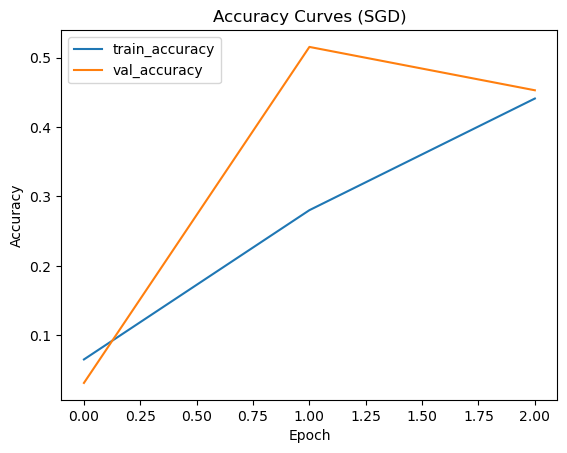

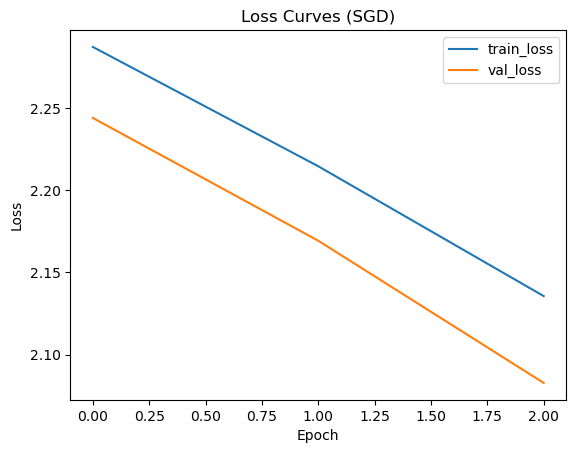

Epoch 1/3
18/18 [==============================] - 24s 1s/step - loss: 2.2499 - accuracy: 0.2948 - val_loss: 2.1223 - val_accuracy: 0.4531
Epoch 2/3
18/18 [==============================] - 24s 1s/step - loss: 1.8498 - accuracy: 0.4720 - val_loss: 1.2885 - val_accuracy: 0.5000
Epoch 3/3
18/18 [==============================] - 25s 1s/step - loss: 0.9599 - accuracy: 0.4629 - val_loss: 0.6868 - val_accuracy: 0.5312


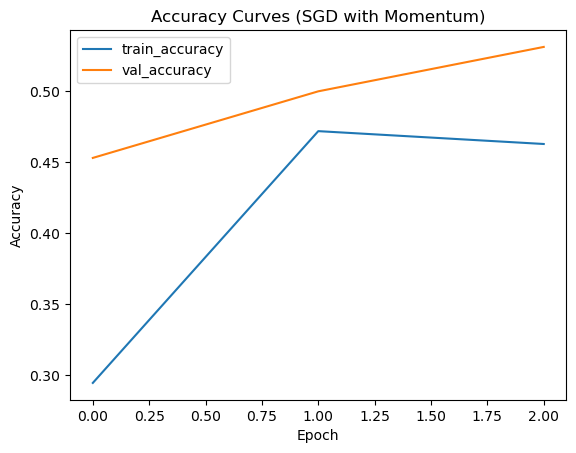

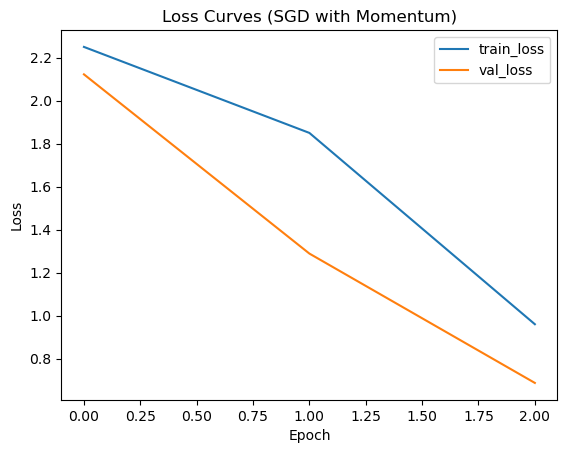

Epoch 1/3
18/18 [==============================] - 28s 1s/step - loss: 1.1023 - accuracy: 0.5009 - val_loss: 0.7094 - val_accuracy: 0.5625
Epoch 2/3
18/18 [==============================] - 23s 1s/step - loss: 0.8096 - accuracy: 0.4991 - val_loss: 0.7088 - val_accuracy: 0.5469
Epoch 3/3
18/18 [==============================] - 26s 1s/step - loss: 0.7462 - accuracy: 0.5382 - val_loss: 0.6965 - val_accuracy: 0.5781


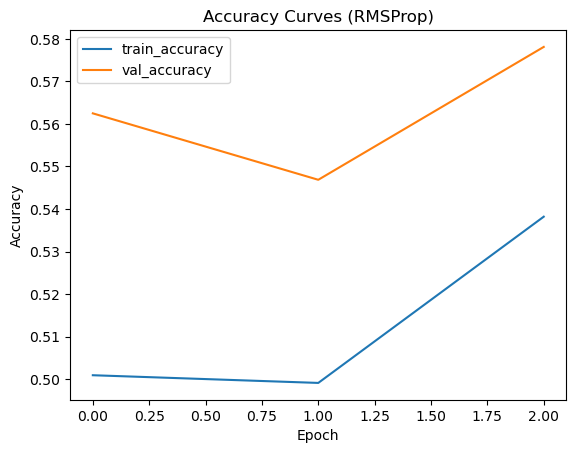

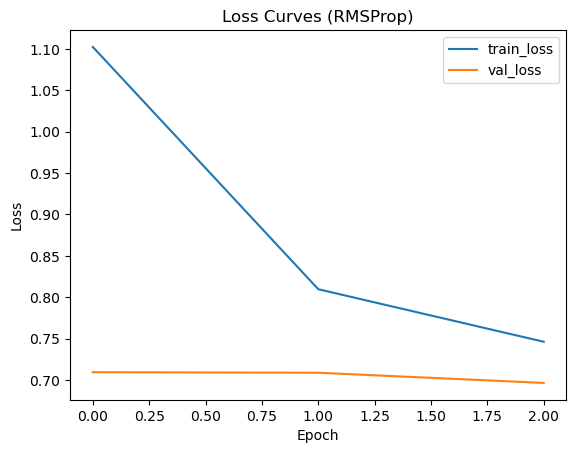

Epoch 1/3
18/18 [==============================] - 25s 1s/step - loss: 2.2304 - accuracy: 0.2966 - val_loss: 2.1550 - val_accuracy: 0.5469
Epoch 2/3
18/18 [==============================] - 24s 1s/step - loss: 2.0914 - accuracy: 0.4774 - val_loss: 1.9415 - val_accuracy: 0.5625
Epoch 3/3
18/18 [==============================] - 24s 1s/step - loss: 1.7817 - accuracy: 0.4828 - val_loss: 1.4638 - val_accuracy: 0.5469


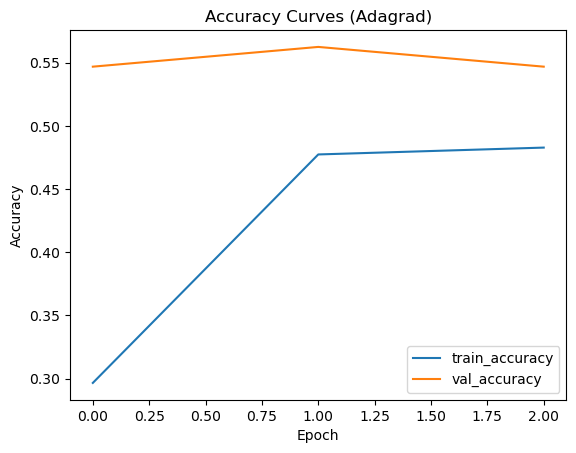

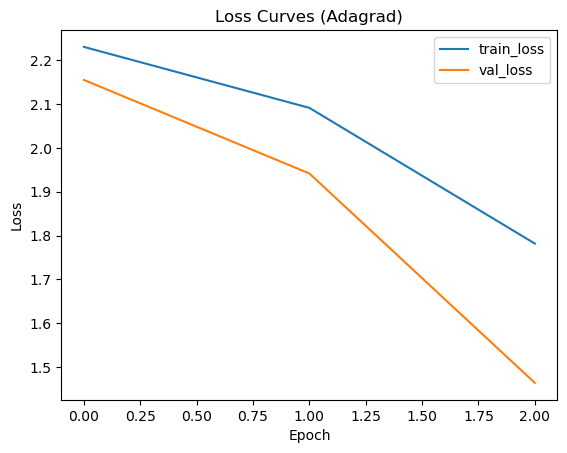

Epoch 1/3
18/18 [==============================] - 27s 1s/step - loss: 1.1451 - accuracy: 0.4756 - val_loss: 0.7848 - val_accuracy: 0.4375
Epoch 2/3
18/18 [==============================] - 23s 1s/step - loss: 0.7837 - accuracy: 0.5099 - val_loss: 0.7084 - val_accuracy: 0.4375
Epoch 3/3
18/18 [==============================] - 25s 1s/step - loss: 0.7471 - accuracy: 0.5154 - val_loss: 0.6854 - val_accuracy: 0.5781


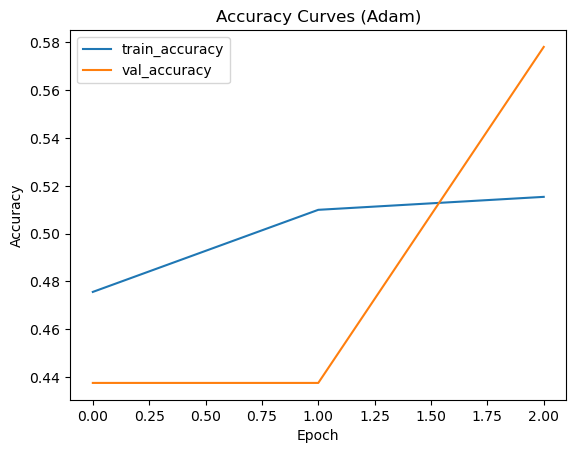

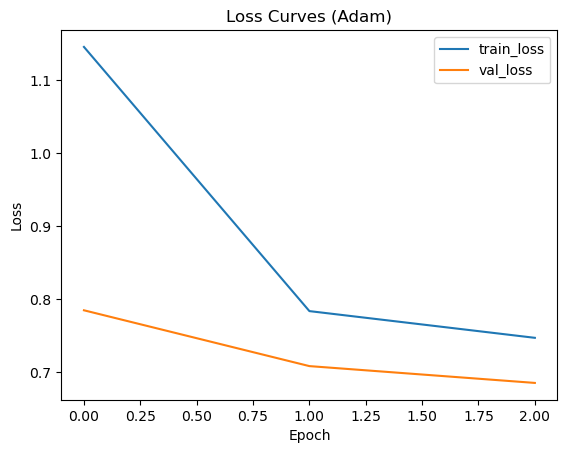

In [19]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adam

# Define a list of optimizers
optimizers = {
    'SGD': SGD(learning_rate=0.0005),
    'SGD with Momentum': SGD(learning_rate=0.0005, momentum=0.9),
    'RMSProp': RMSprop(learning_rate=0.0005),
    'Adagrad': Adagrad(learning_rate=0.0005),
    'Adam': Adam(learning_rate=0.0005)
}

# Loop through each optimizer
for optimizer_name, optimizer in optimizers.items():
    # Create and compile the model with the optimizer
    model = main_model(filter_org='p1', dropout=0.4, dense_size=128, batch_norm=True)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Define data augmentation for training data
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    # Define data augmentation for validation data
    val_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
    
    # Create data generators for training and validation
    train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
    val_generator = val_datagen.flow(X_val, y_val, batch_size=32)
    
    # Train the model using data generators
    history = model.fit(
        train_generator,
        steps_per_epoch=len(X_train) // 32,  # Number of batches per epoch
        epochs=3,
        validation_data=val_generator,
        validation_steps=len(X_val) // 32  # Number of validation batches
    )
    
    # Plot the accuracy and loss curves
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(f'Accuracy Curves ({optimizer_name})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'Loss Curves ({optimizer_name})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Discuss the comparisons between optimizers and select the best optimizer based on performance.


In [37]:
from tensorflow.keras.optimizers import Adam

# Load images and labels
images, labels = load_images_and_labels(data_path, categories, labels_dict, img_height, img_width)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.1, random_state=42)

# Normalize the images
X_train = X_train / 255.0
X_val = X_val / 255.0

# Define the model
best_model = main_model(filter_org='p1', dropout=0.4, dense_size=128, batch_norm=True)

# Compile the model
best_model.compile(optimizer=Adam(learning_rate=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define data augmentation for training data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create data generator for training
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

# Train the model
history = best_model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,  # Number of batches per epoch
    epochs=8,
    validation_data=(X_val, y_val)
)

# Save the best model
best_model.save("best_model_adam.h5")


Epoch 1/8
18/18 [==============================] - 33s 2s/step - loss: 0.9999 - accuracy: 0.5063 - val_loss: 0.8736 - val_accuracy: 0.4308
Epoch 2/8
18/18 [==============================] - 22s 1s/step - loss: 0.8036 - accuracy: 0.4864 - val_loss: 0.6952 - val_accuracy: 0.5385
Epoch 3/8
18/18 [==============================] - 23s 1s/step - loss: 0.7399 - accuracy: 0.4864 - val_loss: 0.7742 - val_accuracy: 0.4308
Epoch 4/8
18/18 [==============================] - 27s 2s/step - loss: 0.7521 - accuracy: 0.4738 - val_loss: 0.7027 - val_accuracy: 0.5692
Epoch 5/8
18/18 [==============================] - 28s 2s/step - loss: 0.7209 - accuracy: 0.5009 - val_loss: 0.6960 - val_accuracy: 0.5231
Epoch 6/8
18/18 [==============================] - 26s 1s/step - loss: 0.7205 - accuracy: 0.4973 - val_loss: 0.7274 - val_accuracy: 0.4308
Epoch 7/8
18/18 [==============================] - 25s 1s/step - loss: 0.7104 - accuracy: 0.5190 - val_loss: 0.6932 - val_accuracy: 0.5692
Epoch 8/8
18/18 [==========